<a href="https://colab.research.google.com/github/kritp144/Sales-Prediction/blob/main/SalesDataPart4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import panda 
import pandas as pd

# Data file assigned
food_sales_data = '/content/drive/MyDrive/DATA SCIENCE/CODES/project 1/sales_predictions.csv'

# Upload the datafile to panda
foodsales_df = pd.read_csv(food_sales_data)

#Examine the first 5 rows
foodsales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The Data presented above is in its raw form therefore, it requires to be cleaned before performing any analytics. Here below, we will go through the precess of cleaning the data.

In [2]:
# Determine the total number of rows and columns
foodsales_df.shape


(8523, 12)

In [3]:
# Determine the Data Type of each variable
foodsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Check for duplicates
sum(foodsales_df.duplicated())

0

In [5]:
# Identify all missing values in the columns
foodsales_df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have Identified that Item Weight has 1463 values missing nad Outlet size has 2410 values missing


## DEALING WITH MISSING DATA

# STEP 1: Dealing with Item Weight
 

Item weight has 1463 missing spaces which accumulated for about 17% of our data. Deleting that much amount of data could skew our results one way or another.

However, the Item Weight has no correlation to Sales and therefore eliminating that column would maintain the intergrity of our data.

In [6]:
# Delete the Item Weight Coulmn
foodsales_df.drop(columns= 'Item_Weight', inplace= True)

In [7]:
# Check for confirmation
foodsales_df.isna().sum()


Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# STEP 2: Dealing with Outlet Size data


Outlet Size has 2410 missing spaces which accumulated for about 28% of our data. Deleting that much amount of data could skew our results one way or another.

However, the Oulet Size  has no correlation to Sales and therefore eliminating that column would maintain the intergrity of our data.

In [8]:
# Delete the Outlet Size Coulmn
foodsales_df.drop(columns= 'Outlet_Size', inplace= True)


In [9]:
# Check for confirmation
foodsales_df.isna().sum()



Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# Round up Item MRP to 2 decimal places
foodsales_df['Item_MRP'] =  foodsales_df['Item_MRP'].round(2)

# Round up Item MRP to 2 decimal places
foodsales_df['Item_Visibility'] =  foodsales_df['Item_Visibility'].round(3)

In [11]:
# Confirm that it got rounded
foodsales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016,Dairy,249.81,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019,Soft Drinks,48.27,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.017,Meat,141.62,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000,Fruits and Vegetables,182.10,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000,Household,53.86,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [12]:
# Check for similar values in Item Type
foodsales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
# Check for similar values in Item Fat Content
foodsales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# Standardize the Low fat Data
#Adding LF to Low Fat
foodsales_df['Item_Fat_Content'] = foodsales_df['Item_Fat_Content'].replace('LF', 'Low Fat')

#Adding low fat to Low Fat
foodsales_df['Item_Fat_Content'] = foodsales_df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [15]:
# Standardize the Regular Data
#Adding reg to Regular

foodsales_df['Item_Fat_Content'] = foodsales_df['Item_Fat_Content'].replace('reg', 'Regular')


In [16]:
#Check to make sure
foodsales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
# Check for similar values in Outlet Location Type
foodsales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
# Check for similar values in Outlet Type
foodsales_df['Outlet_Type'].value_counts()



Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Performing an analysis to determine all minimum, maximum, and mean for all values with numerical values

In [19]:
#Determine all numerical values
foodsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [20]:
#Find the min , max and mean of Item Item_Visibility
print("For Item Visible")
print( "Minimum is ", round(foodsales_df['Item_Visibility'].min(), 3))
print( "Maximum is ", round(foodsales_df['Item_Visibility'].max(), 3))
print( "Mean is ", round(foodsales_df['Item_Visibility'].mean(), 3))

For Item Visible
Minimum is  0.0
Maximum is  0.328
Mean is  0.066


In [21]:
#Find the min , max and mean of Item Item_MRP
print("For Item MRP")
print( "Minimum is ", round(foodsales_df['Item_MRP'].min(), 2))
print( "Maximum is ", round(foodsales_df['Item_MRP'].max(), 2))
print( "Mean is ", round(foodsales_df['Item_MRP'].mean(), 2))

For Item MRP
Minimum is  31.29
Maximum is  266.89
Mean is  140.99


In [22]:
#Find the min , max and mean of Outlet Establishment Year
print("For Item Outlet Establishment Year")
print( "Minimum is ", round(foodsales_df['Outlet_Establishment_Year'].min()))
print( "Maximum is ", round(foodsales_df['Outlet_Establishment_Year'].max()))
print( "Mean is ", round(foodsales_df['Outlet_Establishment_Year'].mean()))

For Item Outlet Establishment Year
Minimum is  1985
Maximum is  2009
Mean is  1998


In [23]:
#Find the min , max and mean of Item Item_MRP
print("For Item Outlet Sales")
print( "Minimum is ", round(foodsales_df['Item_Outlet_Sales'].min(), 2))
print( "Maximum is ", round(foodsales_df['Item_Outlet_Sales'].max(), 2))
print( "Mean is ", round(foodsales_df['Item_Outlet_Sales'].mean(), 2))

For Item Outlet Sales
Minimum is  33.29
Maximum is  13086.96
Mean is  2181.29


In [24]:
foodsales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016,Dairy,249.81,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019,Soft Drinks,48.27,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.017,Meat,141.62,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000,Fruits and Vegetables,182.10,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000,Household,53.86,OUT013,1987,Tier 3,Supermarket Type1,994.7052


## Statistical Analysis
# Lets See what the difference in sales if for:

1) prices greater than $ 150

2) prices lower than $ 150 

3) Low fat vs Regular

In [25]:
# For price over 150 what is the sales
price_over_df = foodsales_df['Item_MRP'] > 150
price_over_df = foodsales_df[price_over_df]
price_over_df.head()


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016,Dairy,249.81,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
3,FDX07,Regular,0.000,Fruits and Vegetables,182.10,OUT010,1998,Tier 3,Grocery Store,732.3800
9,FDU28,Regular,0.094,Frozen Foods,187.82,OUT017,2007,Tier 2,Supermarket Type1,4710.5350
14,FDF32,Low Fat,0.068,Fruits and Vegetables,196.44,OUT013,1987,Tier 3,Supermarket Type1,1977.4260
19,FDU02,Low Fat,0.102,Dairy,230.54,OUT035,2004,Tier 2,Supermarket Type1,2748.4224


In [26]:
# For price under 150 what is the sales
price_under_df = foodsales_df['Item_MRP'] < 150
price_under_df = foodsales_df[price_under_df]
price_under_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,Regular,0.019,Soft Drinks,48.27,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.017,Meat,141.62,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
4,NCD19,Low Fat,0.000,Household,53.86,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,Regular,0.000,Baking Goods,51.40,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,Regular,0.013,Snack Foods,57.66,OUT013,1987,Tier 3,Supermarket Type1,343.5528


In [27]:
# For Sales analysis of lowfat products
lowfat_df = foodsales_df.loc[foodsales_df['Item_Fat_Content'] == 'Low Fat','Item_Outlet_Sales']

lowfat_df.head()

0     3735.1380
2     2097.2700
4      994.7052
7     4022.7636
10    1516.0266
Name: Item_Outlet_Sales, dtype: float64

In [28]:
# For Sales analysis of Regular products

regular_df = foodsales_df.loc[foodsales_df['Item_Fat_Content'] == 'Regular','Item_Outlet_Sales']

regular_df.head()

1     443.4228
3     732.3800
5     556.6088
6     343.5528
8    1076.5986
Name: Item_Outlet_Sales, dtype: float64

## DATA VISUALIZATION

Visualizing Data can help us understand a large number of Data quickly. We can visualize the statistical analysis above into a histogram and a boxplot. This will help us see what the trend in the data suggests.

In [29]:
#Import Visualization libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Histogram

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


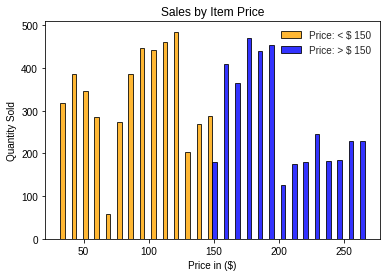

In [30]:
# histogram showing sales when the Price is above and below $150
plt.figure()
plt.hist([price_under_df['Item_MRP'], price_over_df['Item_MRP']],
         edgecolor = 'Black',
         color = ['Orange', 'Blue'],
         bins = 'auto',
         alpha = 0.8,
         label = ['Price: < $ 150', 'Price: > $ 150']);

plt.style.use('seaborn');
plt.title('Sales by Item Price')
plt.ylabel('Quantity Sold');
plt.xlabel('Price in ($)');
plt.legend();
plt.show();

This histogram shows us the statistical analysis conducted regarding the relationship between the sale of a product and its price. 

We can see that we sold more products under $ 150, as the range of spike under that amount go higher than for products sold above that price

# 2) Boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


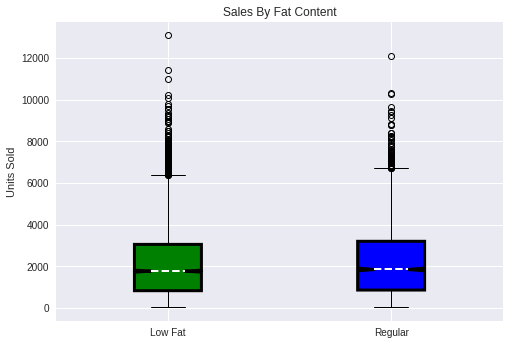

<Figure size 576x396 with 0 Axes>

In [33]:
# Boxplot showing sales analysis for lowfat vs regular
fig, axes = plt.subplots(nrows = 1, ncols = 1);
boxplots = plt.boxplot([lowfat_df,regular_df],
            labels= ['Low Fat', 'Regular'],
            notch= True,
            widths = 0.3,
            patch_artist = True,
            medianprops = dict(linestyle = '--', linewidth = 2, color = 'White'),
            boxprops = dict(linestyle = '--', linewidth = 3, color ='Black'));

lowfat_colorfilter = boxplots['boxes'][0]
lowfat_colorfilter.set_facecolor('Green')

regular_colorfilter = boxplots['boxes'][1]
regular_colorfilter.set_facecolor('Blue')

plt.title('Sales By Fat Content');
plt.ylabel('Units Sold');
plt.show();

fig.tight_layout()
plt.savefig('BoxPlotforFatContent.png',dpi = 300)

This Boxplot graph indicates that the maximum quantity of regular fat items is higher than that of low fat items.

This means that the market still favors regular fat content items over the lower fat content. 

 However, there are outliers in some categories of low fat food where the sale of those products surpasses any outlier item in the regular category.

 This indicates that the market favors some low fat content products over regular fat.

## Look For Correlating Data to help understand our Data Set

# Heatmaps


Setting up a Heatmap will show us what values in our data set correlates with each other. Therefore help us model our data more efficiently.

In [ ]:
# Correlating data coumns

corr = foodsales_df.corr()



In [ ]:
# Make a heatmap
sns.heatmap(corr, cmap = 'Blues', annot= True);


The heat map indicates that there is a moderate correlation between the Item MRP and and the Item Outlet Sales.

This indicates that the price of the item moderately affects the sales quantity of that perticulat Item. 

## Stakeholder Data Visualization 

---



In [ ]:
foodsales_df.info()

In [ ]:
# Sales By Outlet Type

ax = sns.barplot(foodsales_df['Item_Outlet_Sales'], foodsales_df['Outlet_Type'].sort_values(),
                 ci= 0,
                 hue = foodsales_df['Item_Fat_Content']);

plt.title('Sales By Fat Content for Each Outlet', fontsize= 20);
plt.xlabel('Sales ($)', fontsize= 16);
plt.ylabel('Outlet Type', fontsize= 16);
plt.legend();

This Bar Chart shows us the sales of Low and Regular Fat products by different outlet types. By analyzing this graph we can tell that Grocery Stores and Type 2 Supermarkets sell more Low Fat products while Type 1 and 3 Supermarkets sell more of the Regular Fat products.

In [ ]:
sns.lineplot(foodsales_df['Outlet_Establishment_Year'],foodsales_df['Item_Outlet_Sales'],
             hue = foodsales_df['Item_Fat_Content'],
             ci = 0);

plt.title('Sale By Fat Content over the Years', fontsize= 16);
plt.ylabel('Sales ($)', fontsize= 14);
plt.xlabel('Years of Establishment', fontsize= 14);
plt.legend();

Looking at this Line graph, we can tell a couple of things.

1. The years between 1996 and 1999 were generally bad years for sales.

2. In general, more Regular Fat content products are sold but the sale of Low Fat products is not that far behind. Infact, between 1986 and 1989, more Low Fat products were sold. We can notice the same trend starting in 2008.

3. In recent years the sales are dropping again.